In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [3]:
dataset=pd.read_csv(r"/content/sample_data/flightdata.csv")
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [ ]:
dataset=dataset.drop('Unnamed: 25',axis=1)
dataset.isnull().sum()
                

In [8]:
#filter the dataset to climinte columns that aren't relevant to a predictive model.
#dataset=dataset[["FL_NUM","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","ORIGIN","DEST","CRS_ARR_TIME","DEP_DELIS","ARR_DELIS"]]
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [9]:
dataset[dataset.isnull().any(axis=1)].head(10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
177,2016,1,1,9,6,DL,N3743H,2834,13487,MSP,...,0.0,852,1151.0,NaN,NaN,0.0,1.0,231.0,NaN,1399.0
179,2016,1,1,10,7,DL,N924DN,86,13487,MSP,...,NaN,1632,NaN,NaN,NaN,1.0,0.0,104.0,NaN,528.0
184,2016,1,1,10,7,DL,N922DX,557,13487,MSP,...,0.0,912,1500.0,NaN,NaN,0.0,1.0,107.0,NaN,528.0
210,2016,1,1,10,7,DL,N951DN,1096,11433,DTW,...,NaN,1303,NaN,NaN,NaN,1.0,0.0,123.0,NaN,528.0
478,2016,1,1,22,5,DL,N387DA,1542,14747,SEA,...,NaN,723,NaN,NaN,NaN,1.0,0.0,318.0,NaN,2422.0
481,2016,1,1,22,5,DL,N960AT,1795,10397,ATL,...,NaN,2014,NaN,NaN,NaN,1.0,0.0,149.0,NaN,760.0
491,2016,1,1,22,5,DL,N972AT,2312,13487,MSP,...,NaN,2149,NaN,NaN,NaN,1.0,0.0,174.0,NaN,1029.0
499,2016,1,1,23,6,DL,N321NB,423,12478,JFK,...,NaN,1600,NaN,NaN,NaN,1.0,0.0,155.0,NaN,760.0
500,2016,1,1,23,6,DL,N948AT,425,12478,JFK,...,NaN,1827,NaN,NaN,NaN,1.0,0.0,167.0,NaN,760.0
501,2016,1,1,23,6,DL,N712TW,427,12478,JFK,...,NaN,1053,NaN,NaN,NaN,1.0,0.0,373.0,NaN,2422.0


In [ ]:
#dataset['DEP_DELIS'].mode()

In [10]:
#replace the missing values with ls.
dataset=dataset.fillna({'ARR_DELIS':1})
dataset=dataset.fillna({'DEP_DELIS':0})
dataset.iloc[177:185]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
177,2016,1,1,9,6,DL,N3743H,2834,13487,MSP,...,0.0,852,1151.0,NaN,NaN,0.0,1.0,231.0,NaN,1399.0
178,2016,1,1,9,6,DL,N975AT,2839,11433,DTW,...,0.0,1724,1709.0,-15.0,0.0,0.0,0.0,117.0,106.0,509.0
179,2016,1,1,10,7,DL,N924DN,86,13487,MSP,...,NaN,1632,NaN,NaN,NaN,1.0,0.0,104.0,NaN,528.0
180,2016,1,1,10,7,DL,N671DN,87,11433,DTW,...,1.0,1649,1703.0,14.0,0.0,0.0,0.0,129.0,119.0,528.0
181,2016,1,1,10,7,DL,N319NB,423,12478,JFK,...,0.0,1600,1607.0,7.0,0.0,0.0,0.0,155.0,151.0,760.0
182,2016,1,1,10,7,DL,N587NW,440,12478,JFK,...,0.0,849,835.0,-14.0,0.0,0.0,0.0,159.0,146.0,760.0
183,2016,1,1,10,7,DL,N813DN,485,12478,JFK,...,1.0,1945,1955.0,10.0,0.0,0.0,0.0,390.0,335.0,2422.0
184,2016,1,1,10,7,DL,N922DX,557,13487,MSP,...,0.0,912,1500.0,NaN,NaN,0.0,1.0,107.0,NaN,528.0


In [11]:
import math
for index,row in dataset.iterrows():
  dataset.loc[index,'CRS_ARR_TIMS']=math.floor(row['CRS_ARR_TIME']/100)
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CRS_ARR_TIMS
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,21.0
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,14.0
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,12.0
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,13.0
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,6.0


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['DEST']=le.fit_transform(dataset['DEST'])
dataset['ORIGIN']=le.fit_transform(dataset['ORIGIN'])

In [ ]:
dataset.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CRS_ARR_TIMS
0,2016,1,1,1,5,DL,N836DN,1399,10397,0,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,21.0
1,2016,1,1,1,5,DL,N964DN,1476,11433,1,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,14.0
2,2016,1,1,1,5,DL,N813DN,1597,10397,0,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,12.0
3,2016,1,1,1,5,DL,N587NW,1768,14747,4,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,13.0
4,2016,1,1,1,5,DL,N836DN,1823,14747,4,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,6.0


In [13]:
dataset['ORIGIN'].unique()

array([0, 1, 4, 3, 2])

In [14]:
dataset=pd.get_dummies(dataset,columns=['ORIGIN','DEST'])
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,...,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,2016,1,1,1,5,DL,N836DN,1399,10397,14747,...,1,0,0,0,0,0,0,0,0,1
1,2016,1,1,1,5,DL,N964DN,1476,11433,13487,...,0,1,0,0,0,0,0,0,1,0
2,2016,1,1,1,5,DL,N813DN,1597,10397,14747,...,1,0,0,0,0,0,0,0,0,1
3,2016,1,1,1,5,DL,N587NW,1768,14747,13487,...,0,0,0,0,1,0,0,0,1,0
4,2016,1,1,1,5,DL,N836DN,1823,14747,11433,...,0,0,0,0,1,0,1,0,0,0


In [15]:
x=dataset.iloc[:,0:8].values
y=dataset.iloc[:,8:9].values

In [16]:
x

array([[2016, 1, 1, ..., 'DL', 'N836DN', 1399],
       [2016, 1, 1, ..., 'DL', 'N964DN', 1476],
       [2016, 1, 1, ..., 'DL', 'N813DN', 1597],
       ...,
       [2016, 4, 12, ..., 'DL', 'N583NW', 1823],
       [2016, 4, 12, ..., 'DL', 'N554NW', 1901],
       [2016, 4, 12, ..., 'DL', 'N843DN', 2005]], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
z=oh.fit_transform(x[:,4:5]).toarray()
t=oh.fit_transform(x[:,5:6]).toarray()
#x=np.delete(x,[4,7],axis=1)

In [ ]:
z

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
t

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
x=np.delete(x,[4,5],axis=1)

In [ ]:
#flight_data.describe()

In [ ]:
#sns.distplot(flight_data.MONTH)

In [ ]:
#sns.scatterplot(x='ARR_DELAY',y='ARR_DEL15'data=flight_data)

In [ ]:
#sns.catplot(x="ARR_DEL15",y="ARR_DELAY",kind='bar',data=flight_data)

<ipython-input-17-aa6664222663>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

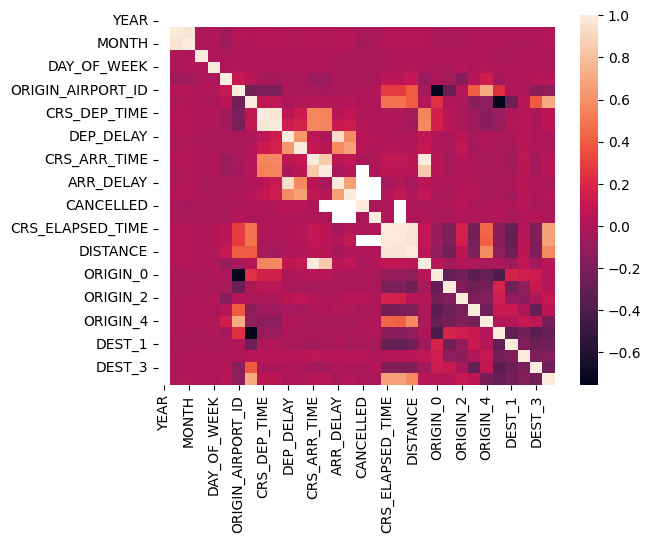

In [17]:
sns.heatmap(dataset.corr())

In [ ]:
#dataset=pd.get_dummies(dataset,columns=['ORIGIN','DEST'])
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,...,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,2016,1,1,1,5,DL,N836DN,1399,10397,14747,...,1,0,0,0,0,0,0,0,0,1
1,2016,1,1,1,5,DL,N964DN,1476,11433,13487,...,0,1,0,0,0,0,0,0,1,0
2,2016,1,1,1,5,DL,N813DN,1597,10397,14747,...,1,0,0,0,0,0,0,0,0,1
3,2016,1,1,1,5,DL,N587NW,1768,14747,13487,...,0,0,0,0,1,0,0,0,1,0
4,2016,1,1,1,5,DL,N836DN,1823,14747,11433,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
x=dataset.iloc[:,0:8].values
y=dataset.iloc[:,8:9].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#from sklearn.model_selection import train_test_split
#train_x,test_x,train_y,test_y=train_test_split(dataset.drop('ARR_DEL15',axis=1),df['ARR_DEL15'],test_size=0.2,random_state=0)

In [ ]:
x_test.shape

(2247, 8)

In [ ]:
x_train.shape

(8984, 8)

In [ ]:
y_test.shape

(2247, 1)

In [ ]:
y_train.shape

(8984, 1)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x_train=sc.fit_transform(x_train)
#x_test=sc.transform(x_test)


In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#classifier=DecisionTreeClassifier(random_state=0)
#classifier.fit (x_train,y_train)

In [ ]:
#decisiontree=classifier.predict(x_test)

In [ ]:
#decisiontree

In [ ]:
#from sklearn.metrics import accuracy_score
#desacc=accuracy_score(y_test,decisiontree)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')


In [ ]:
#rfc.fit(x_train,y_train)


In [ ]:
#y_predict=rfc.predict(x_test)

In [ ]:
#Importing the Keras libraries and packages
#import tensorflow
#from tesorflow.keras.models import Sequential
#from tesorflow.keras.layers import Dense

In [ ]:
#Creating ANN skleton view
#classifiaction=Sequential()
#classification.add(Dense(30,activation='relu'))
#classification.add(Dense(128,activation='relu'))
#classification.add(Dense(64,activation='relu'))
#classification.add(Dense(32,activation='relu')
#classification.add(Dense(1,activation='sigmoid'))

In [ ]:
#classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classification.fit(x_train,y_train,batch_size=4,validation_slite=0.2,epochs=100)


NameError: ignored

In [ ]:
# Decision tree
#y_pred=classifier.predict([[129,99,1,0,0,1,0,1,1,1,0,1,1,1,1,1]])
#print(y_pred)
#(y_pred)

In [ ]:
#y_pred=rfc.predict([[129,99,1,0,0,1,0,1,1,1,0,1,1,1,1,1]])
#print(y_pred)
#(y_pred)

In [ ]:
#classification.save(flight.hs)

In [ ]:
#y_pred=classification.predict(x_test)

In [ ]:
#y_pred

In [ ]:
#y_pred=(y_pred>0.5)
#y_pred

In [ ]:
def predict_exit(sample_value):
  sample_value=np.array(sample_value)
  sample_value=sample_value.reshape(1,-1)
  sample_value=sc.transform(sample_value)
  return classifier.predict(sample_value)












In [ ]:
#test=classifiction.predidct([[1,1,121.000000,36.0,0,0,1,0,1,1,1,1,1,1,1,1]])
#if test==1:
 #print('Prediction:Chance of delay')
#else:
  #print('Prediction:No chance of delay.')

In [ ]:
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier

In [ ]:
#dfs=[]
#models=[('RF',RandomForestClassifier()),
        #('DecisionTree',DecisionTreeClassifier()),
        #('ANN',MLPClassifier())
#]
#results=[]
#names=[]
#scoring=['accuracy','precision_weighted','recall_weightf1_weighted','roc_auc']
#target_names=['no delay','delay']
#for name,model in models:
  #kfold=model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
  #cv_results=model_selection.cross_validate(model, x_train, y_train, cv=kflod, scoring=scoring)
  #clf=model.fit(x_train, y_train)
  #y_pred=clf.predict(x_test)
  #print(name)
  #print(classification_report(y_test, y_pred, target_names=target_names))
  #results.append(cv_results)
  #names.append(name)
  #this_df=pd.DataFrame(cv_results)
  #this_df['model']=name
  #dfs.append(this_df)
#final=pd.concat (dft, ignore_index=True)
#return final 


In [ ]:
#print('Training accuracy: ',accuracy_score(y_train,y_predict_train))
#print('Testing accuracy: ',accuracy_score(y_test,y_predict))

In [ ]:
#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test, y_predict)
#cm


In [ ]:
#from sklearn.metrics import accuracy_score
#desacc=accuracy_score(y_test,decisiontree)
#desacc

In [ ]:
#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,decisiontree)
#cm

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report
#score = accuracy_score(y_pred,y_test)
#print('The accuracy for ANN model is:{}%'.format(score*100)) 

In [ ]:
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test,y_pred)
#cm 

In [ ]:
parameters={
    'n_estimators':[1,20,30,55,68,74,90,120,115],
    'criterion':['gini','entropy'],
    'max_features':["auto","sqrt","log2"],
    'max_depth':[2,5,8,10],'verbose':[1,2,3,4,6,8,9,10]
}

In [ ]:
#RCV=RandomizedSearchCV(estimator=rf,param_distributions=parameters,cv=10),n_iter=4)

In [ ]:
#RVC.fit(x_train,y_train)

In [ ]:
#bt_params=RCV.best_params_
#bt_score=RCV.best_score_

In [ ]:
#bt_params

In [ ]:
#bt_score

In [ ]:
#model=RandomForestClassifier(verbose=10,n_estimators=120,max_features='log2',max_depth=10,criterion='entropy')
#RCV.fit(x_train,y_train)

In [ ]:
#y_predict_rf=RCV.predict(x_test)

In [ ]:
#RFC=accuracy_score(y_test,y_predict_rf)
#RFC

In [ ]:
#import pickle
#pickle.dump(RCV,open('flight.pkl','wb'))

In [ ]:
#importing the necessary dependencies
from flask import Flask,request,render_template
import numpy as np
import pandas as pd
import pickle
import os

In [ ]:
#model=pickle.load(open('flight.pkl','rb'))
#app=Flask(_name_)#initializing the app

In [ ]:
#@app.route('/')
#def home():
  #return render_template("index.html")
#@app.route('/prediction',methods=["POST"])

In [ ]:
def predict():
  name=reqest.form['name']
  month=request.form['month']
  dayofmonth=request.form['dayofmonth']
  dayofweek=request.form['dayofweek']
  origin=request.form['origin']
  if(oring=="msp"):
    origin1,origin2,origin3,origin4,origin5=0,0,0,0,1
  if(origin=="dtw"):
    origin1,origin2,origin3,origin4,origin5=1,0,0,0,0
  if(origin=="jfk"):
    origin1,origin2,origin3,origin4,origin5=0,0,1,0,0
  if(origin=="sea"):
    origin1,origin2,origin3,origin4,origin5=0,1,0,0,0
  if(origin=="alt"):
    origin1,origin2,origin3,origin4,origin5=0,0,0,1,0   


In [ ]:
#destination=request.form['destination']
#if(destination=="msp"):
  #destination1,destination2,destination3,destination4,destination5=0,0,0,0,1
#if(destination=="dtw"):
  #destination1,destination2,destination3,destination4,destination5=1,0,0,0,0,0
#if(destination=="jfk"):
  #destination1,destination2,destination3,destination4,destination5=0,0,1,0,0
#if(destination=="sea"):
  #destination1,destination2,destination3,destination4,destination5=0,1,0,0,0
#if(destination=="alt"):
  #destination1,destination2,destination3,destination4,destination5=0,0,0,1,0
#dept=request.form['dept']
#arrtime=request.form['arrtime']
#actdept=request.form['actdept']
#dept15=int(dept)-int(actdept)
#total=[[name,month,dayofmonth,dayofweek,origin1,origin2,origin3,origin4,origin5,destination1,destination1,destination2,destination3,destination4,destination5]]
#print(total)
#y_pred=model.predict(total)
#print(y_pred)
#if(y_pred==[0.]):
  #ans="The Flight will be on time "
#else:
  #ans="The Flight will be delayed"
#return render_template("index.html",showcase=ans)

In [ ]:
#if_name_=='_main_':
  #app.run(debug=True)

In [ ]:
#*Sering Flask app "app"(lazy loading)
#*Environment:production
#WARNING:This is a development server.Do not use it in a production deployment.
#use a production WSGI server instead.
#*Debug mode:on
#*Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)